# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../my_hw_repo/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [8]:
#use describe to get summary
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE scores are much larger numbers

#### Question 4. Drop data points with missing data


In [11]:
df_new = df_raw.dropna()

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [12]:
df_new.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


Answer: In my new dataframe, there are now numerical values for the 25/50/75 percentiles because I've gotten rid of any members in the sample with missing (null) data

#### Question 6. Create box plots for GRE and GPA

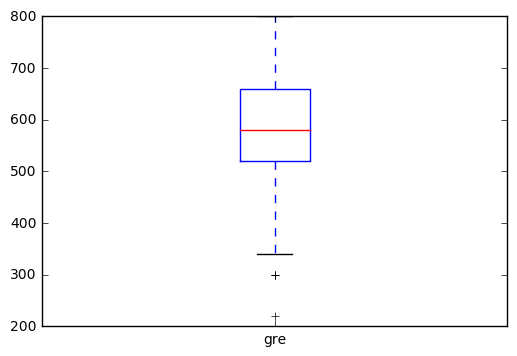

In [13]:
#boxplot 1
df_new.gre.plot(kind='Box')

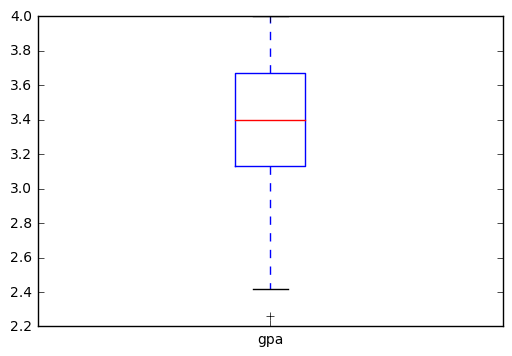

In [14]:
#boxplot 2 
df_new.gpa.plot(kind='Box')

#### Question 7. What do this plots show?

Answer: These show the medians, min, max, and interquartile range.

#### Question 8. Describe each distribution 

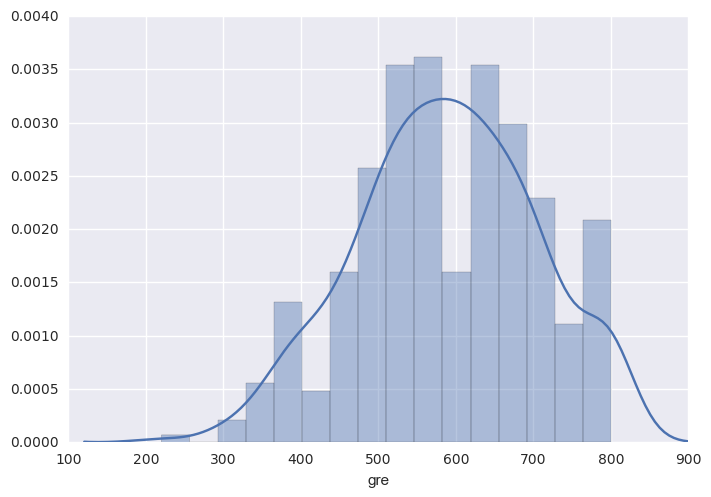

In [19]:
# plot the distribution of gre
import seaborn as sns
sns.distplot(df_new.gre);

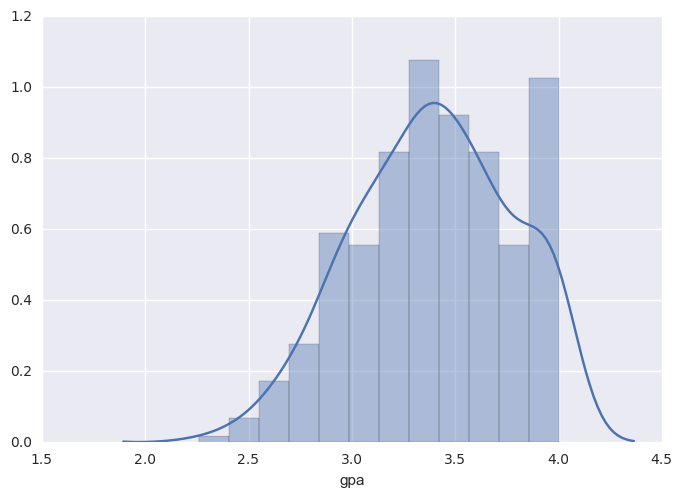

In [20]:
#plot the distribution of gpa
sns.distplot(df_new.gpa);

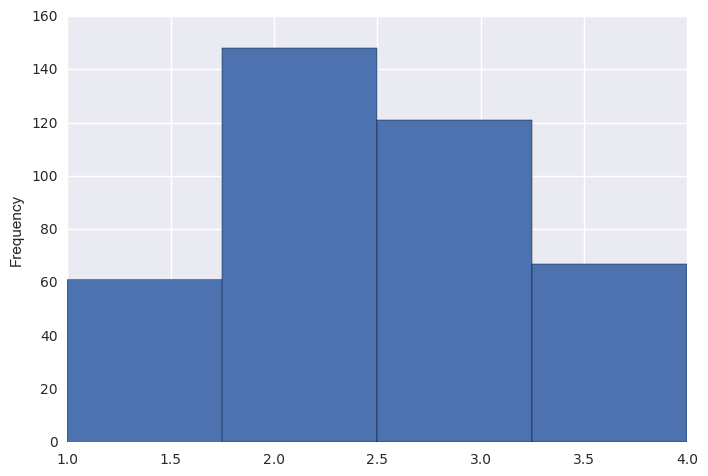

In [26]:
#plot the distribution of prestige - use histogram since it's a categorical variable
df_new.prestige.plot(kind='hist', bins = 4);

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

In [22]:
#test for normalcy of gre
from scipy.stats import normaltest
normaltest(df_new['gre'])

NormaltestResult(statistic=3.8179829306094266, pvalue=0.14822980613776662)

In [23]:
#test for normalcy of gpa
normaltest(df_new['gpa'])

NormaltestResult(statistic=13.079875560916445, pvalue=0.001444578377229117)

In [27]:
#test for normalcy of prestige
normaltest(df_new['prestige'])

NormaltestResult(statistic=49.421253219400995, pvalue=1.8548603556153736e-11)

Answer: Using the scipy normal test, only gre is approximatey normal (p value sufficiently large, >5% or so).

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: GRE, the only approximately normal variable, also contains outliers. Perhaps eliminating the outliers would lead to more sound analysis. GPA looks skewed to the right - I'd adjust for that to make a more normal distribution. Prestige is a categorical variable, so we could perhaps break the analysis into 4 buckets, one for each level of prestige, and work within each bucket.

#### Question 11. Which of our variables are potentially colinear? 

In [32]:
# create a correlation matrix for the data
df_new.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: gre and GPA are potentially colinear, with a correlation coefficient around 0.4 - could mean that good students are also likely to be smart students

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: I've already determined the disribution of "prestige" is approximately normal. Now I'll run a linear regression (OLS) of "prestige" vs. "admit" to determine if there is a meaningful relationship. The null hypothesis is that coeff = 0 or that there is no relationship, so if the coeff doesn't equal 0, with p-value < .05, the null hypothesis is rejected, meaning there is a relationship. In this case, a lower number means more prestige, so a meaningful negative coefficient means there would be a positive correlation between the rank/prestige of a school and admissions into grad school. 

#### Question 14. What is your hypothesis? 

Answer: Students at more prestigious undergraduate schools get into grad school at a meaningfully higher rate than students at less prestigious schools.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

Instead of dropping missing data, perhaps insert medians adjusted by colinearity coefficients.

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data